## Census Income

#### Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


#### Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
# Import Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing DataSet

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Statistical Exploration of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have 32560 observations and 15 columns, dataset has mix of data types.

In [4]:
# check if any duplicate entry or duplicate row with same value exist

df.duplicated().sum()

24

In [5]:
# Let check how many question mark (" ?") inside dataset.

df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [6]:
# Let check if any whitespace, 'NA' or '-' exist in dataset.

df.isin([' ','NA','-']).sum().any()

False

In [7]:
# Let replace ' ?' with np.NaN

df=df.replace(' ?',np.NaN)

Comment:

We have Replace ' ?' with np.NaN

No whitespace, NA, '-' exist in dataset.

In [8]:
# Let drop duplicated entry from dataset before checking null values.

df.drop_duplicates(keep='last', inplace=True)

In [9]:
df.shape

(32536, 15)

#### Missing value check

<Axes: >

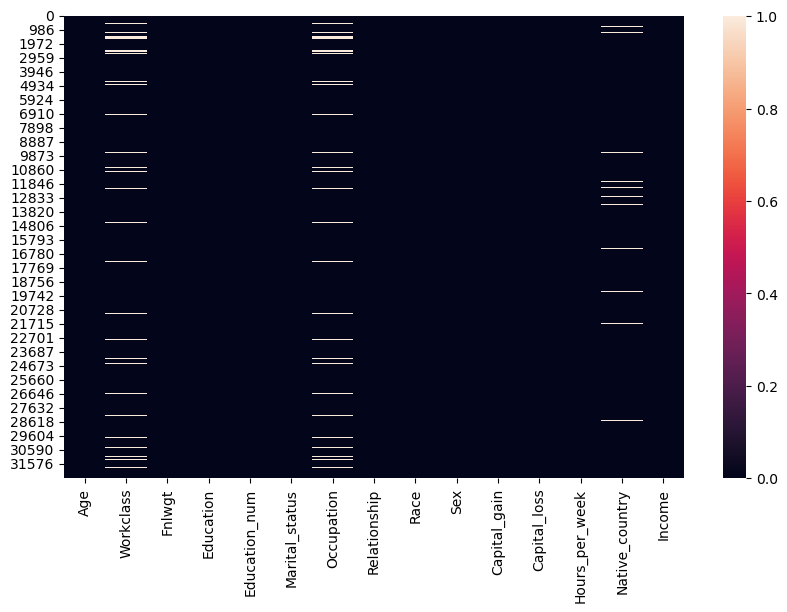

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [11]:
# Finding what percentage of data is missing from the dataset

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


Comment:

There are missing values in Occupation,workclass, Native country.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Observation:

There are 32536 rows , 14 Independent columns and 1 Target feature.

Age,Fnlwgt, education_num, capital gain, capital loss, hours per week are Numerical variable and having int64 datatypes.

Work class, Education,Marital status, occupation, relationship, race,sex,native country are categorical feature with object datatypes.

In [13]:
# Separating numerical and categorical variable

Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

#### Missing value imputation

In [14]:
# Imputating Missing value with mode for categorical features

df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

#### Missing Value Check After Imputataion

In [15]:
# Finding what percentage of data is missing from the dataset

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


Comment :

Finally, No Missing Value is Present.

In [16]:
# Statistical Matrix

df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation:

The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 37.

The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.

While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.

The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [17]:
# Start Exploring categorial features with Enlisting Value counts & Sub-categories

for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

#### Exploratory Data Analysis(EDA)

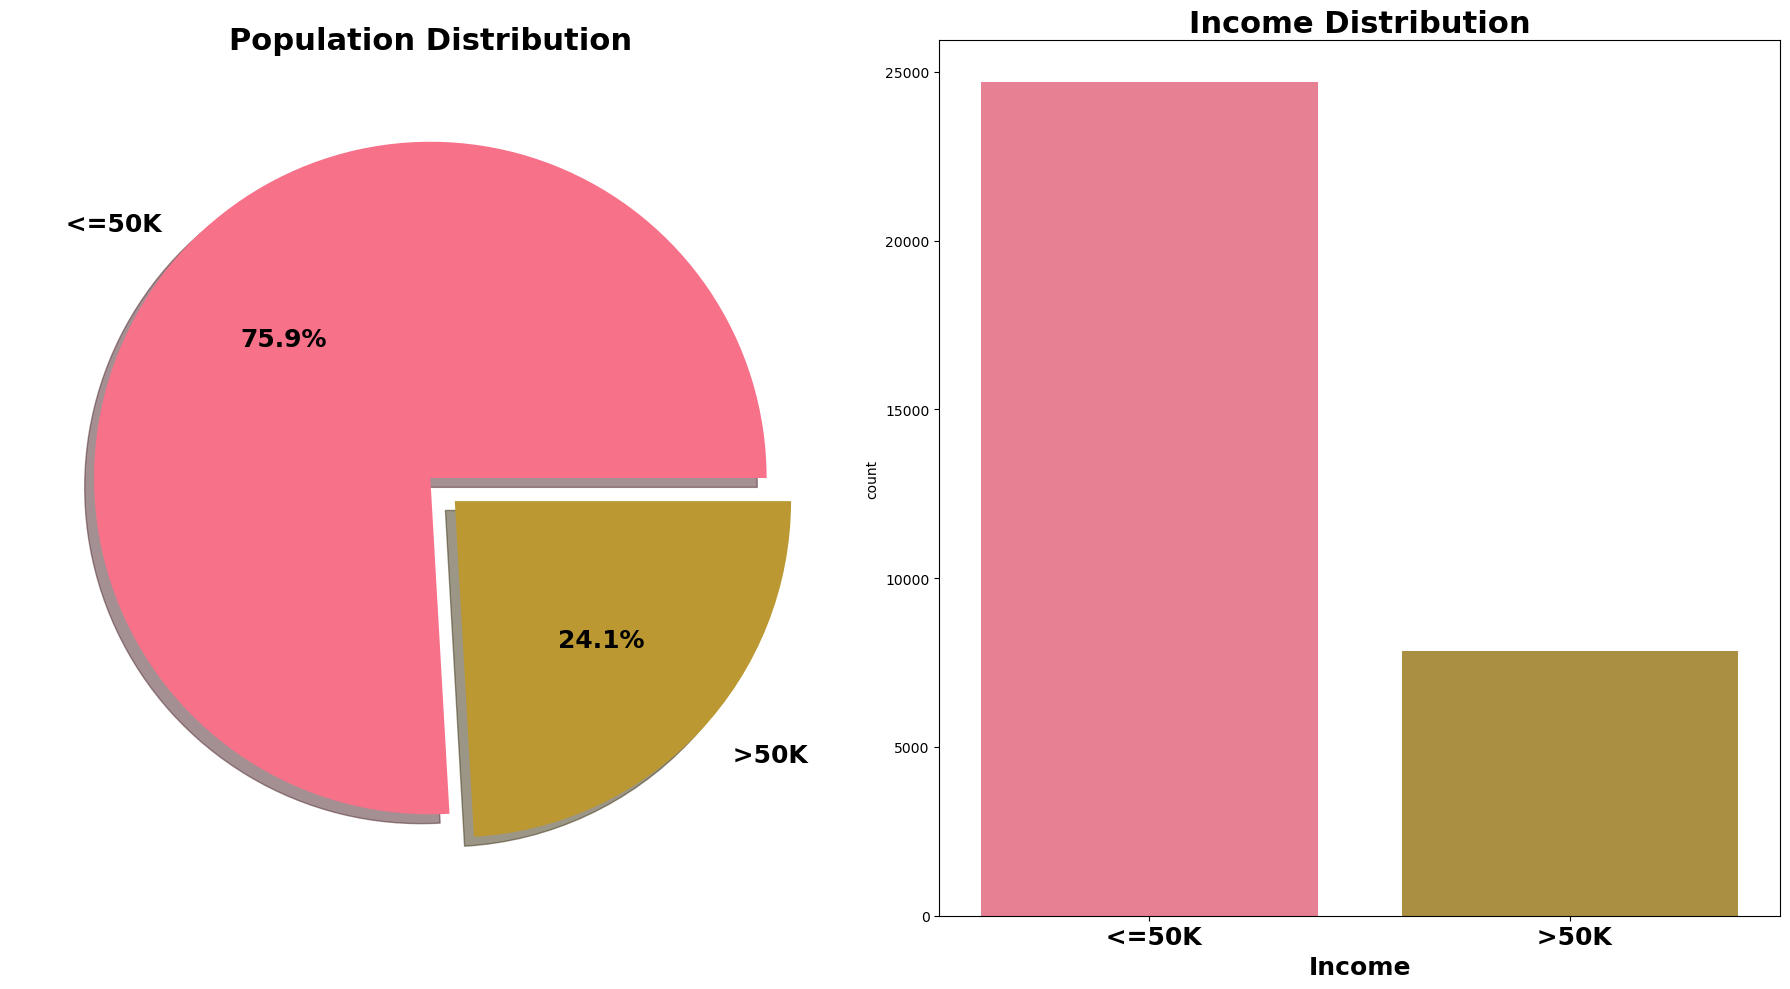

In [18]:
# Start EDA by analysing our target variable first.

plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

Observation :

75.9 % population (24697 peoples) have income less than 50K.

Our task is to predict income and we see that target variable income is imbalanced.

In [19]:
# Exploration of Age

print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [20]:
# Defining function to create new columns to classify people according different age gruop

def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'

In [21]:
# Calling function age_group

df['age_group']=df['Age'].apply(age_group)

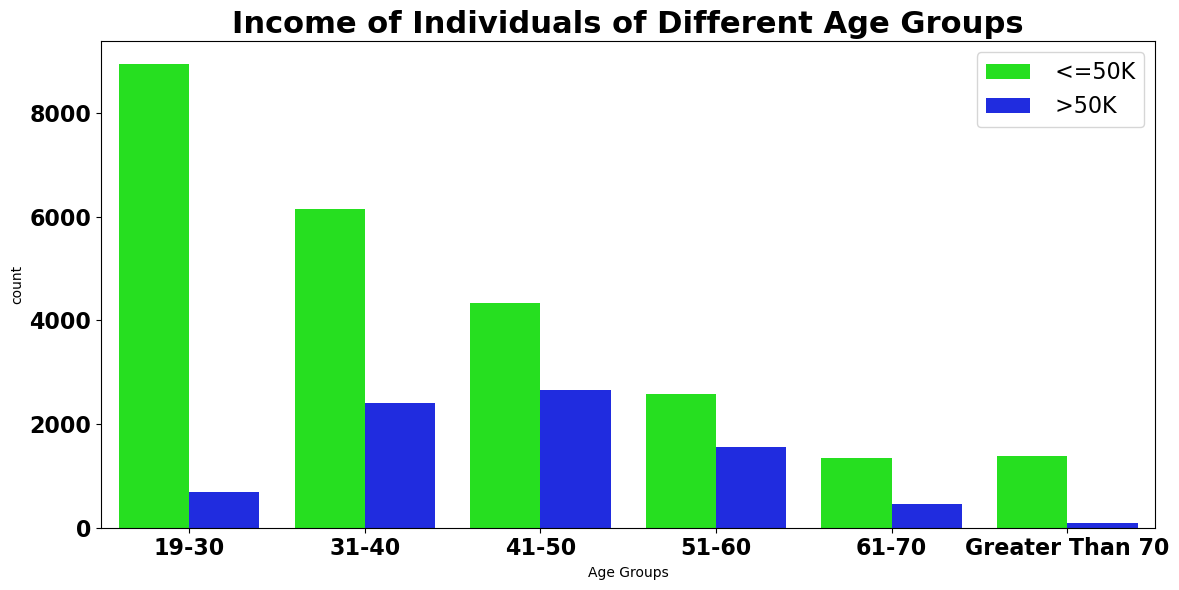

In [22]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p = sns.countplot(x=df['age_group'], hue=df['Income'], palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

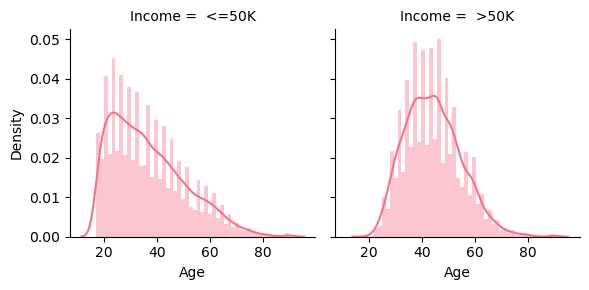

In [23]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

Observation:

Here comes an interesting observation. We already know that only 24% people earnings more than 50K dollors and this plot tell us which age group then belong.

almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70. Might be some lucky old ones has created good Retirement Plan compare to rest old peoples.

We can find maximum people earning more than 50K dollors belong to age group 41-50 & 51-60. It will be interesting to find out which profession lead this income to this category.

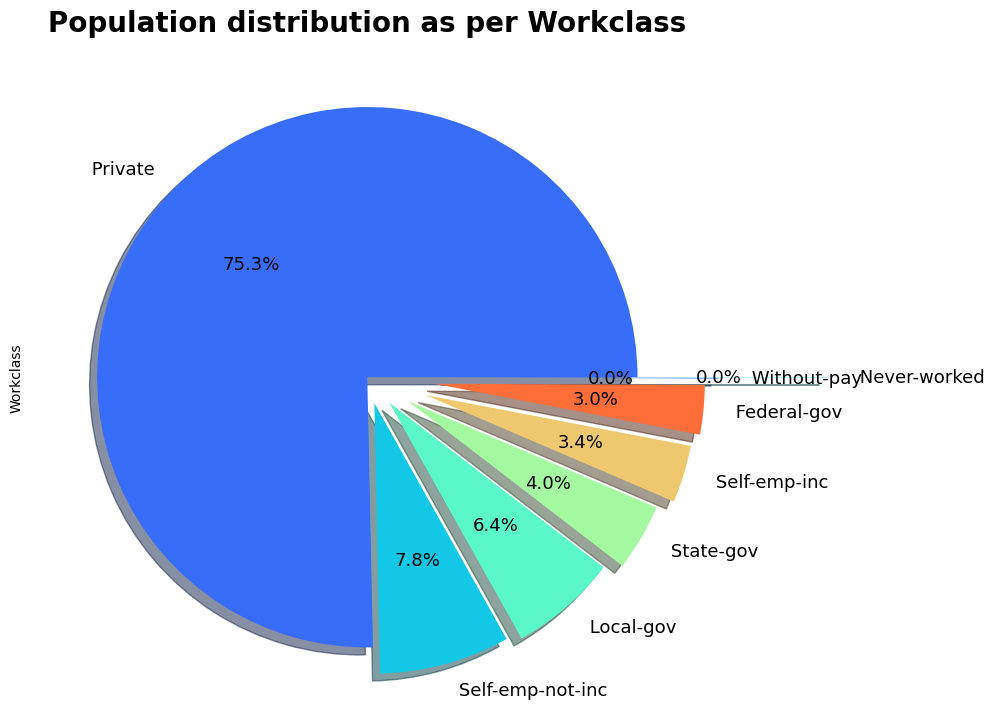

In [24]:
# So let dive into workclass and see what insight we get from there.

plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

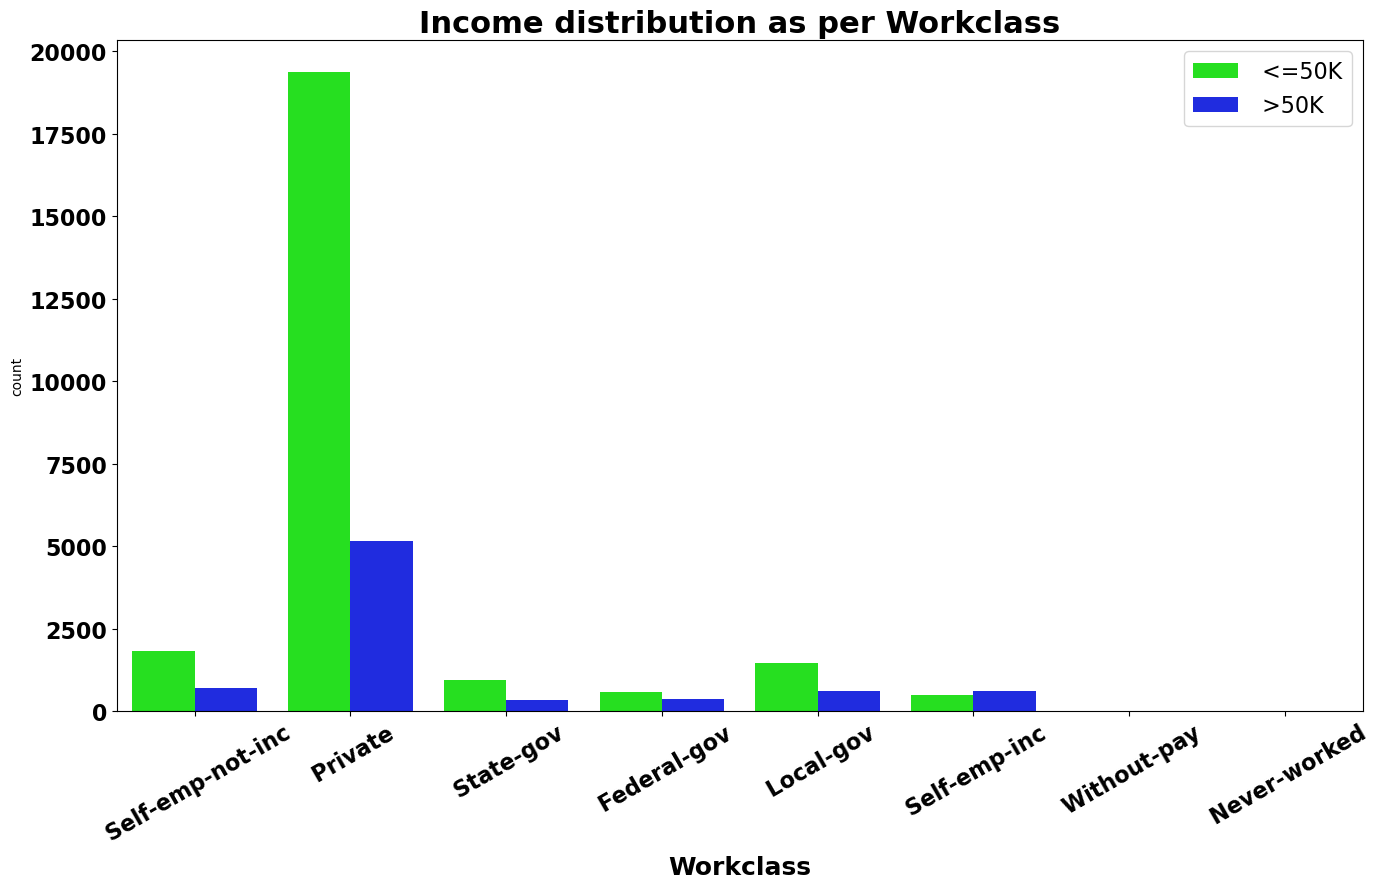

In [25]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Workclass'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

In [26]:
pd.crosstab(df['Income'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


Observation :

75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %

Interseting observation comes with Self-Employed Incorporated category where the number of people who earn more than 50K dollars exceed those earning less than it !

There is significant difference between private sector employees income where less than 25 % people earn more than 50K dollars an year.

Another quite surprising insight comes from Federal Goverment countplot where We can see very minute difference between the number of people whose income is more or less than 50K dollars an year. Same goes with state goverment with some difference.

Yes there exist category for who never worked and Working without pay but very few people belong to it.These people may be unempolyeed or colleges students. But Number is less And thats Good !!!

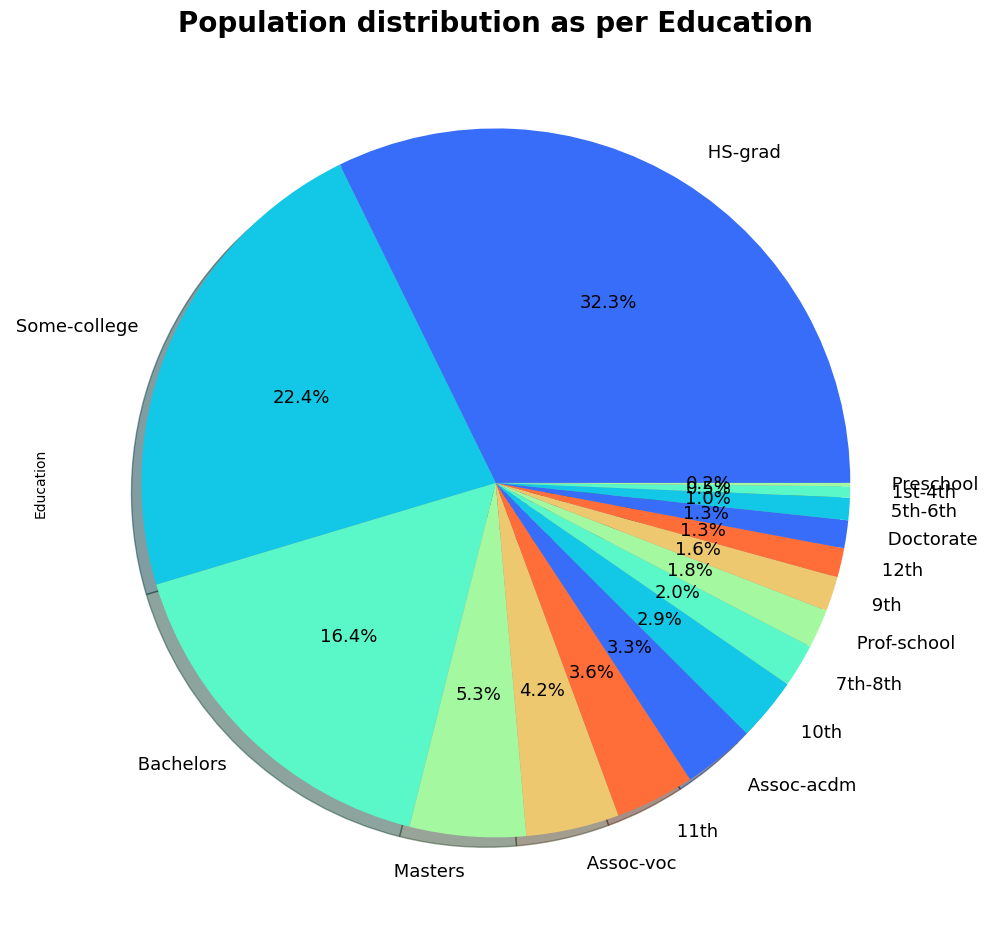

In [27]:
# Education Vs Income

plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Education', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

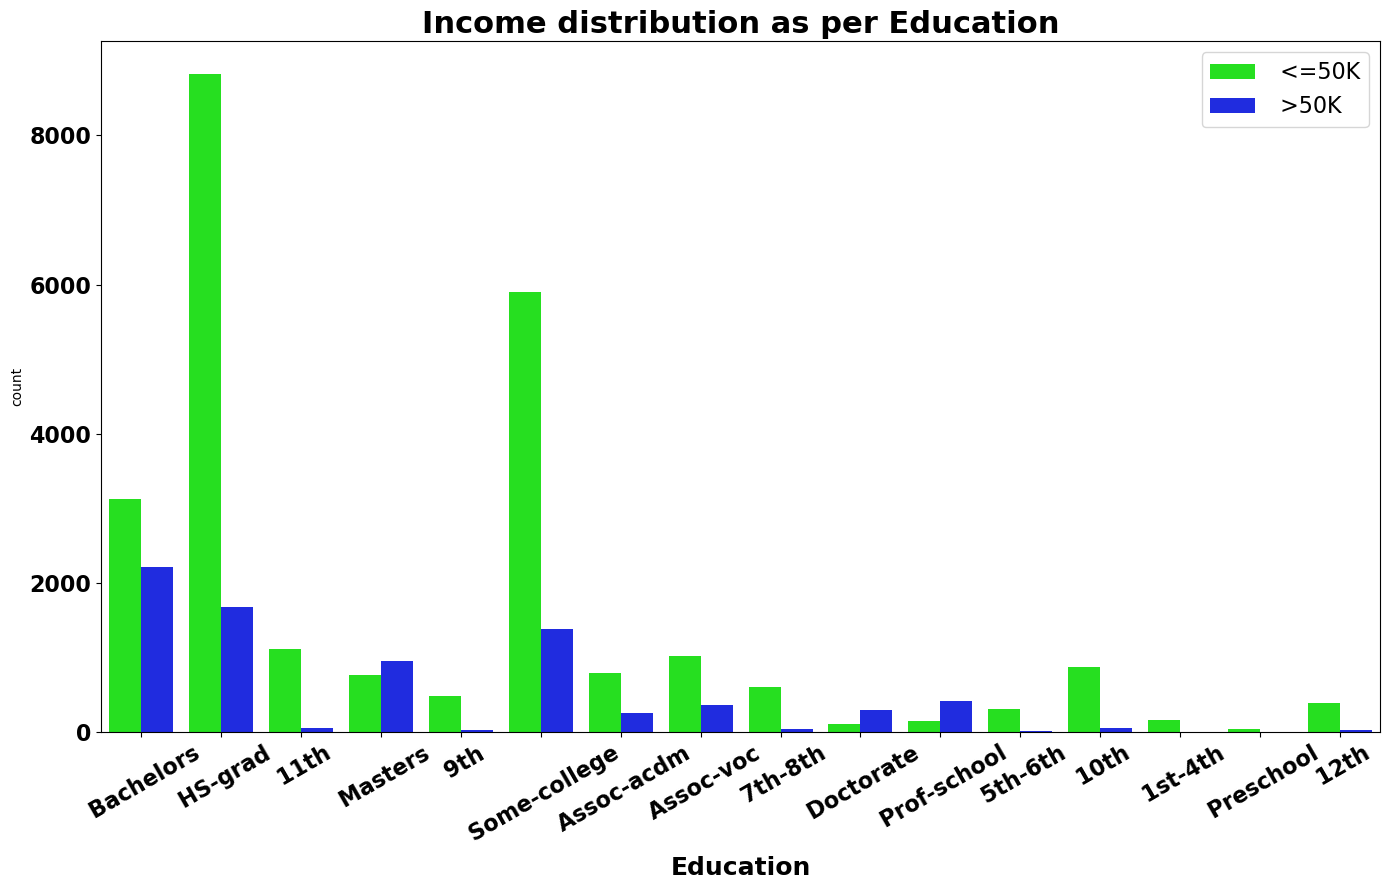

In [28]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Education'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

Observation:

Out of all population 32.3% people with HS-Grad education which is most prevalent education level.

5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.

There are very handful people who earn more than 50 K dollars having education below 12th level.

Maximum number of people who earn more than 50K dollars are Bachelors degree holder.

Here comes interesting observation about income of highly educated people. In case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.

In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [29]:
pd.crosstab(df['Education'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


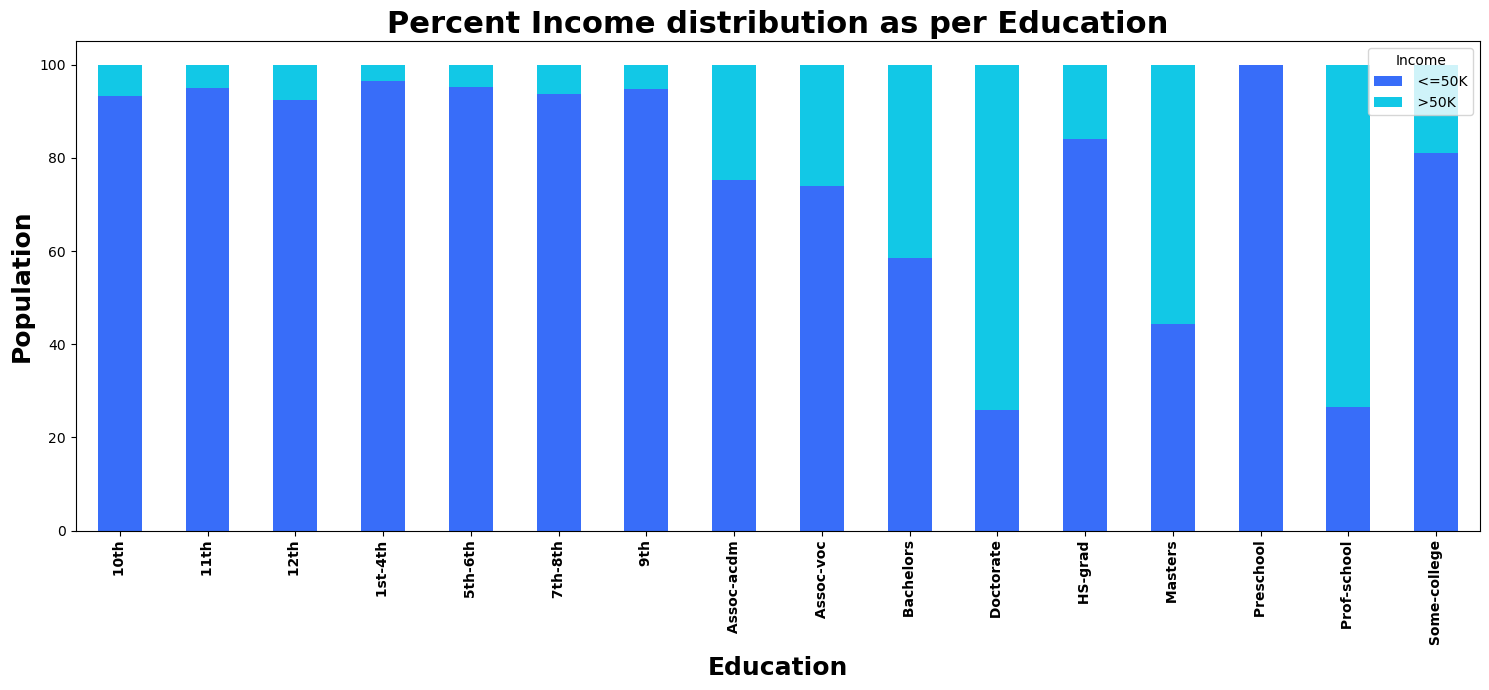

In [30]:
# Percentage Income distribution in terms of Education

sns.set_palette('rainbow')
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

Observation:

In terms of percentage 75 % of Doctorate people earn more than 50K dollars an years, followed by Prof- school.

So, Highly earning people most of times comes with Masters or Doctorate education background.

From crosstab we can see that private sector is highest recuriter for HS-Grad with 8305 people.

Private sector is also major recurtier of highly eduacated people with masters, doctorate followed by local goverment.

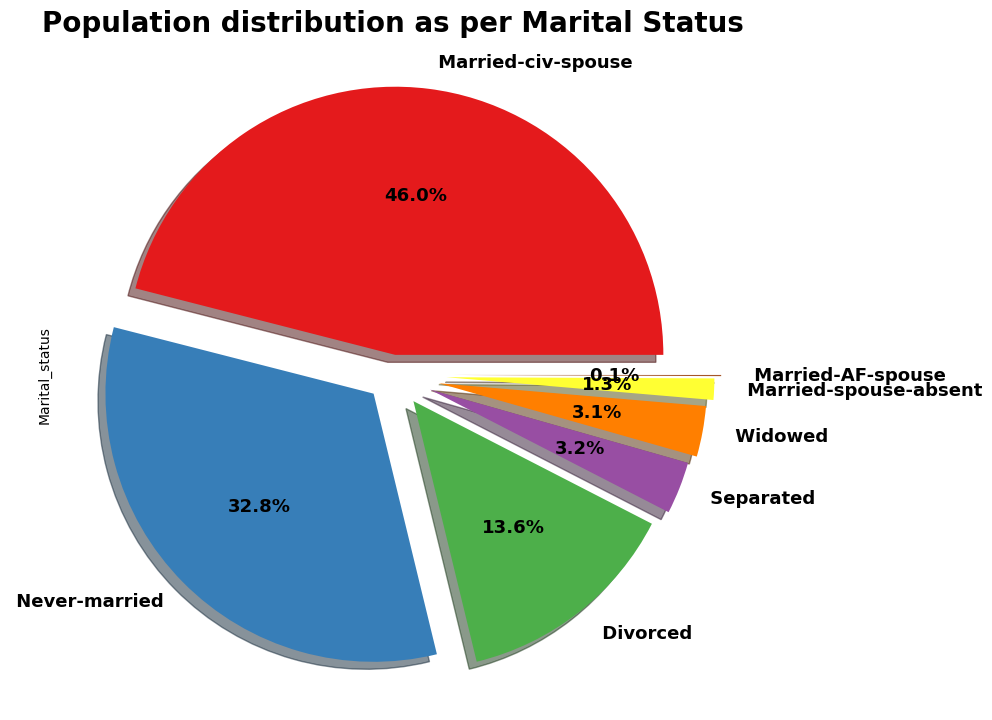

In [31]:
# Impact of Marital Status on Income

plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],
                                             textprops ={'fontsize':13,'fontweight':'bold'},shadow=True)
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

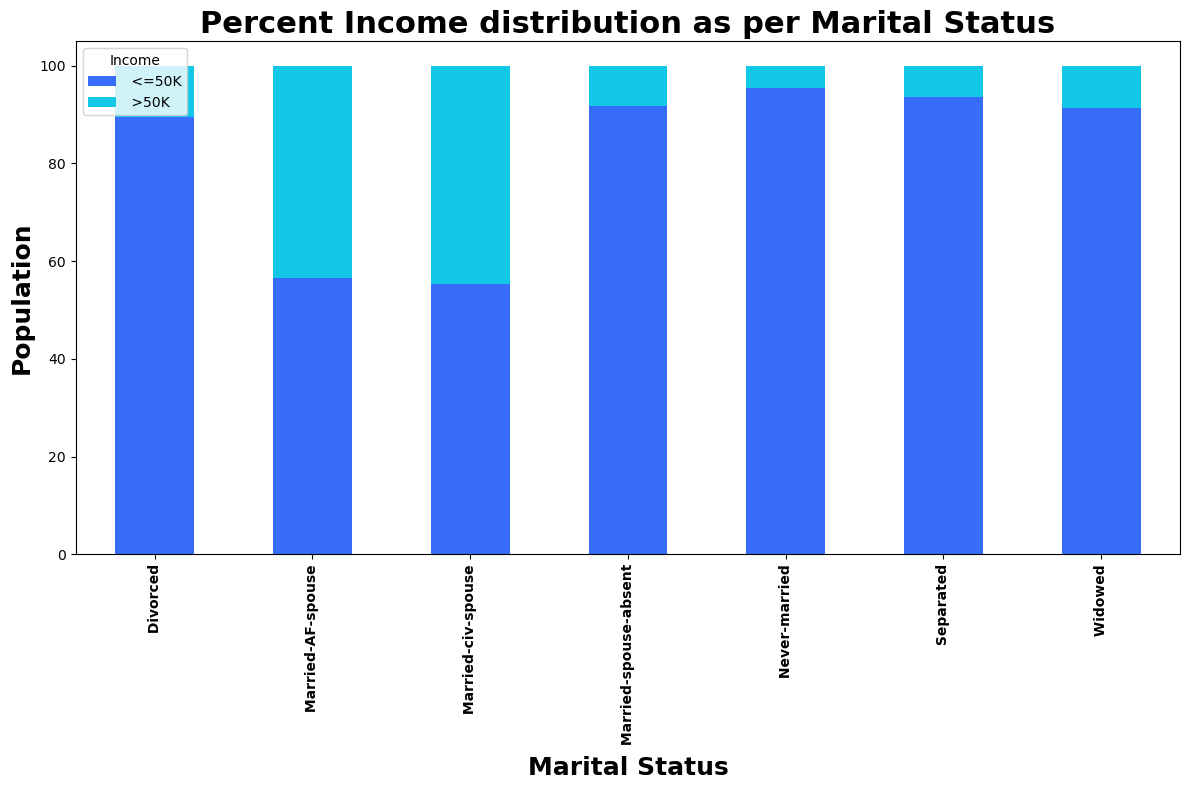

In [32]:
# Percentage Income distribution in terms of Education

sns.set_palette('rainbow')
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=22, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

Observation :

Married people are most like to earn more than 50K dollars an year.

Reason Might be Emotional support and stability of life than who are divorced/separated.

One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.

For others, there are less than 25% of the adults earning more than 50K dollars an year.

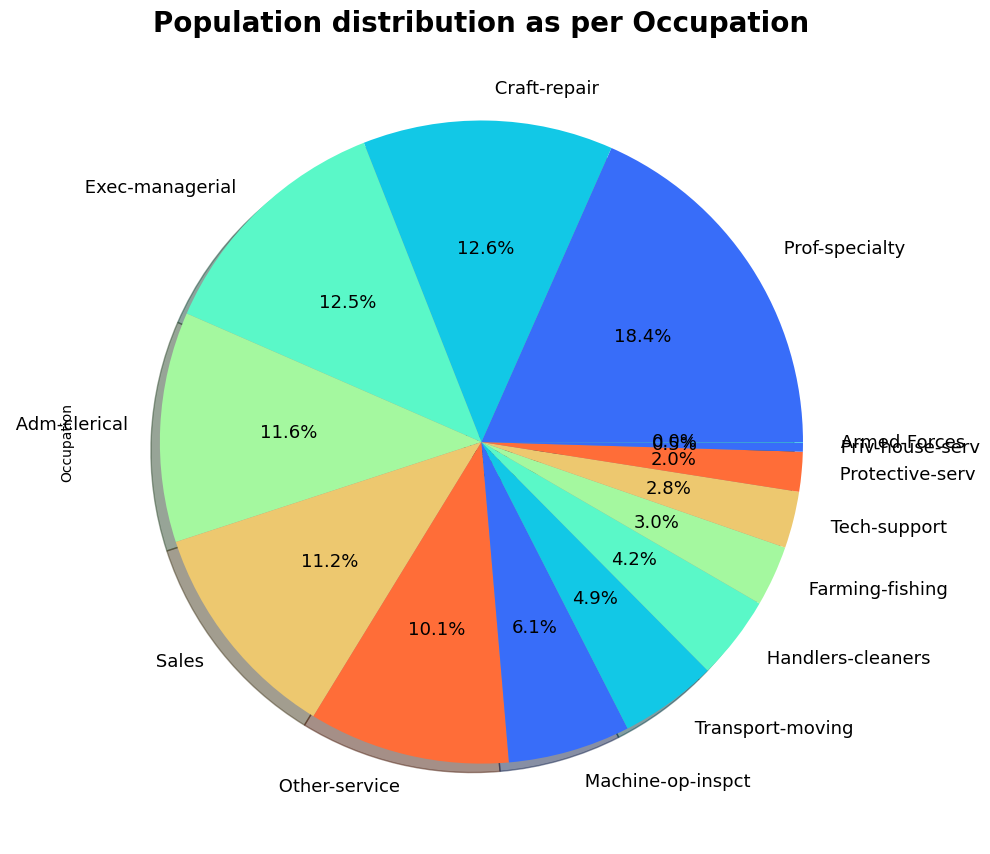

In [33]:
# Occupation VS Income

plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

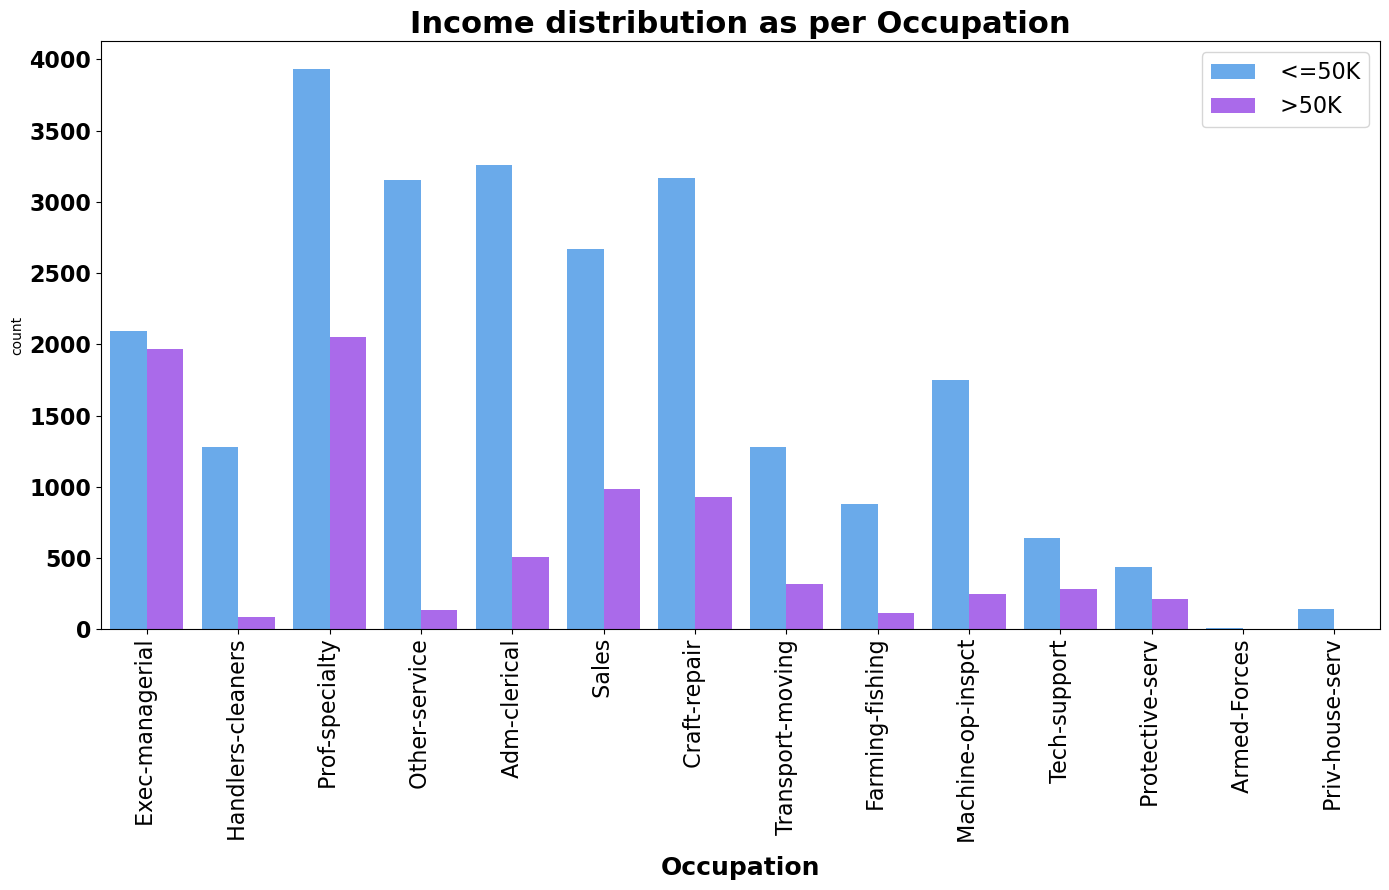

In [34]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Occupation'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


Observation :

Exec-managerial role are equally likely to earn more than 50K dollars an year.

Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.

Around 25% of the people working in Sales earn more than 50K dollars an year.

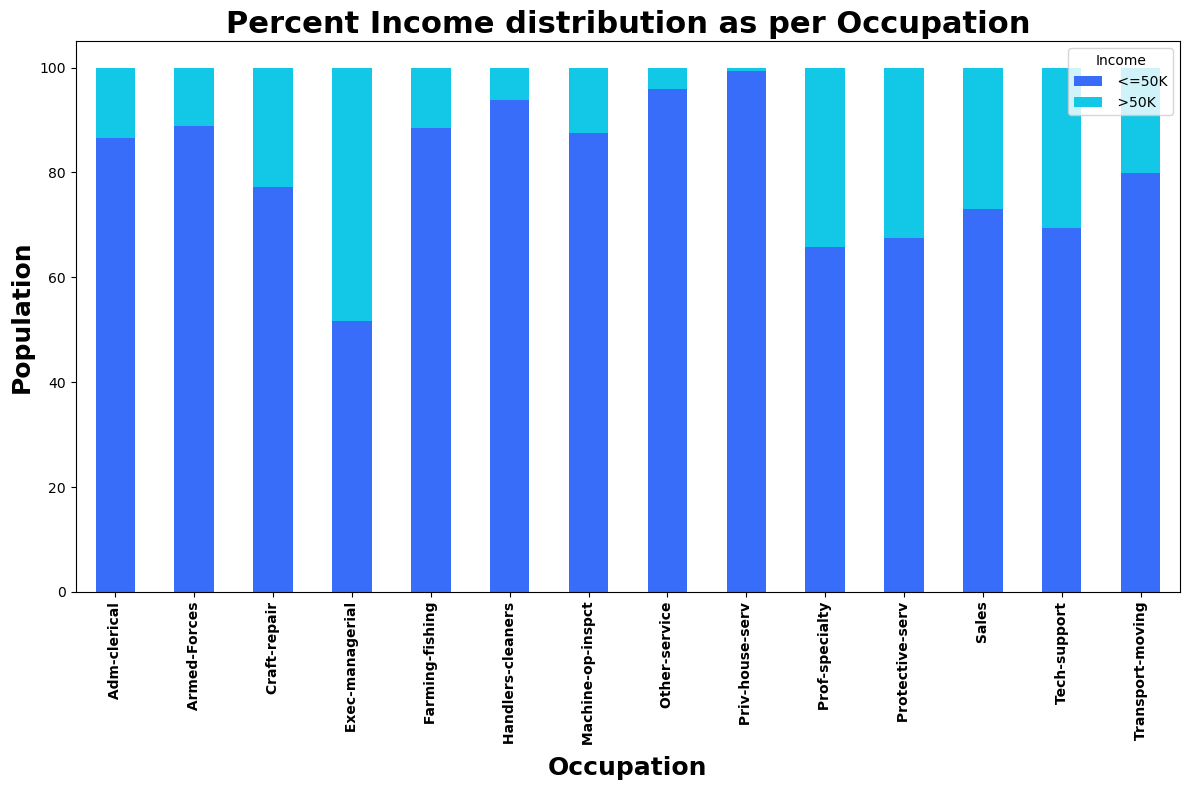

In [35]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [36]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='winter_r')

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


Observation :

Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.

If we talk in term of percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.

There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.

- Minimum chances for Greater than 50K Club comes from Private House Service occupation where 1/147 chance of getting more than 50K dollars an year.

In [37]:
pd.crosstab(df['Occupation'],df["Workclass"], margins=True).style.background_gradient(cmap='winter_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


Observation :

Here is another surprising element, there are 7 peoples From Never Worked Category with High earning Profession of Prof-speciality. Same from Without pay workclass we find 6 peoples with Exec-Managerial. Possibly they are working with unpaid internship profile.

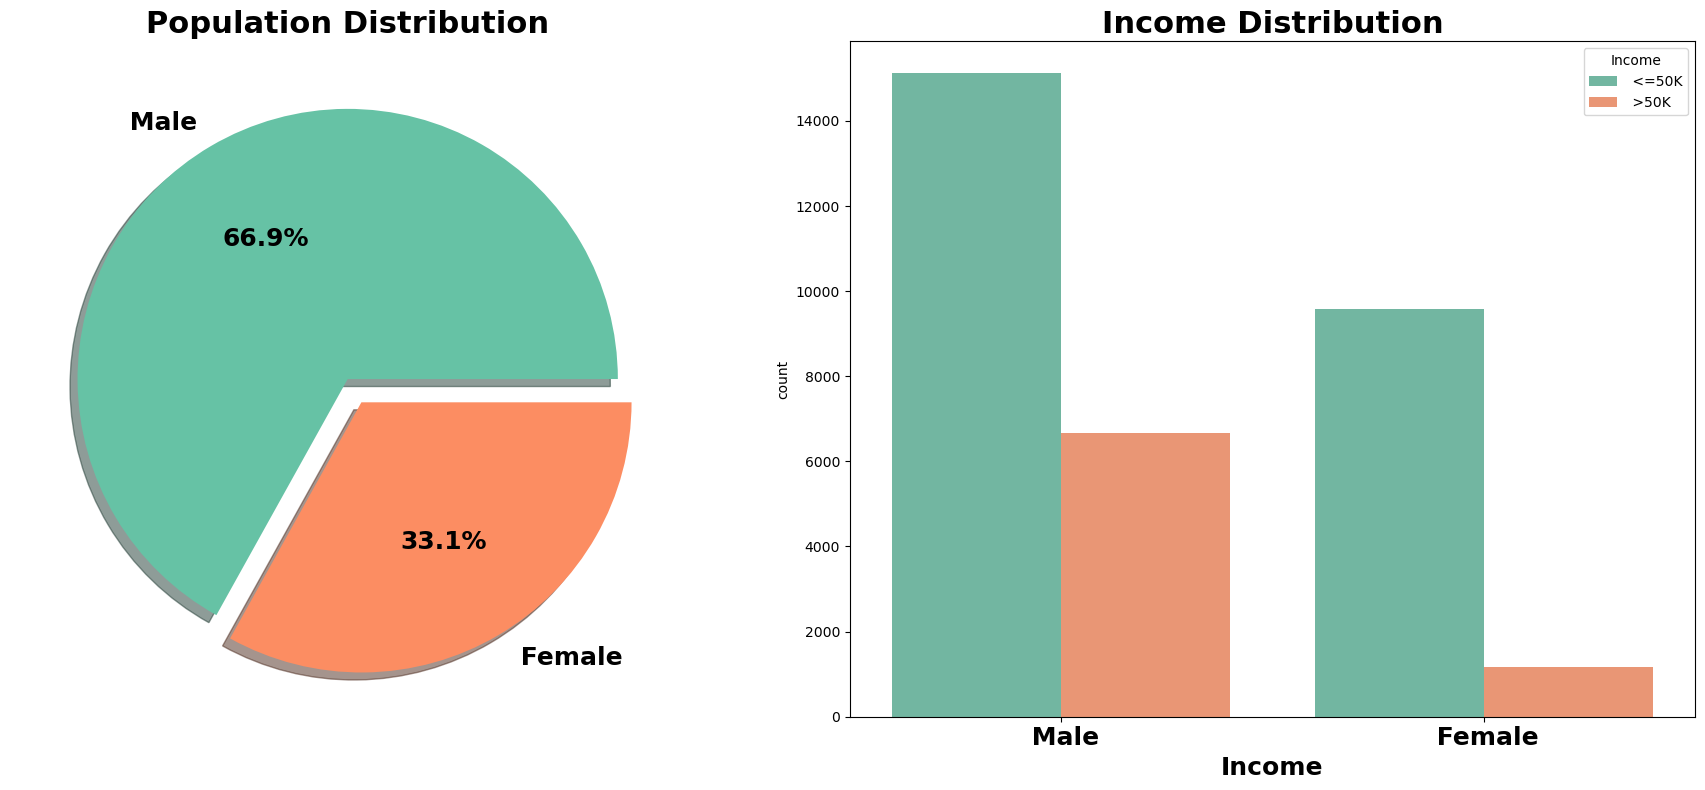

In [38]:
# Sex Vs Income
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Sex',hue=df['Income'] ,data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

Observation:

Significant gap between male and female earnings.

Less than 10% Women in Greater Than 50K Dollar Club.

Around 33% of Men earning more than 50K dollars an year.

In [39]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True).style.background_gradient(cmap='winter_r')

Observation:

Out of all population 33 % are womens. Inside that most of females work in Adm-clerical,Other-service,Prof-specialty.

Same as in case of Men Maximum number in Greater than 50K dollars Club in females comes from Prof-speciality,Exec-Managerial profession.

Maximum men work in Prof-Specialty.

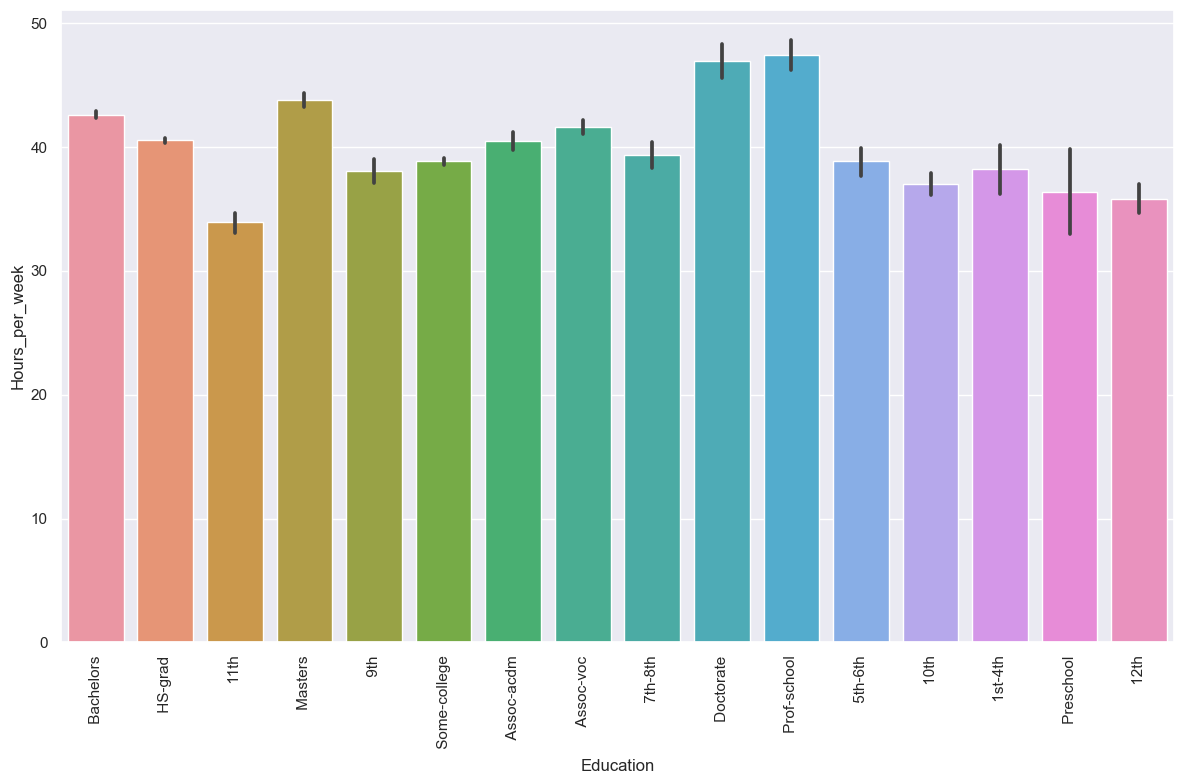

In [40]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

#### Encoding categorical data

In [41]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


#### Feature selection and Engineering

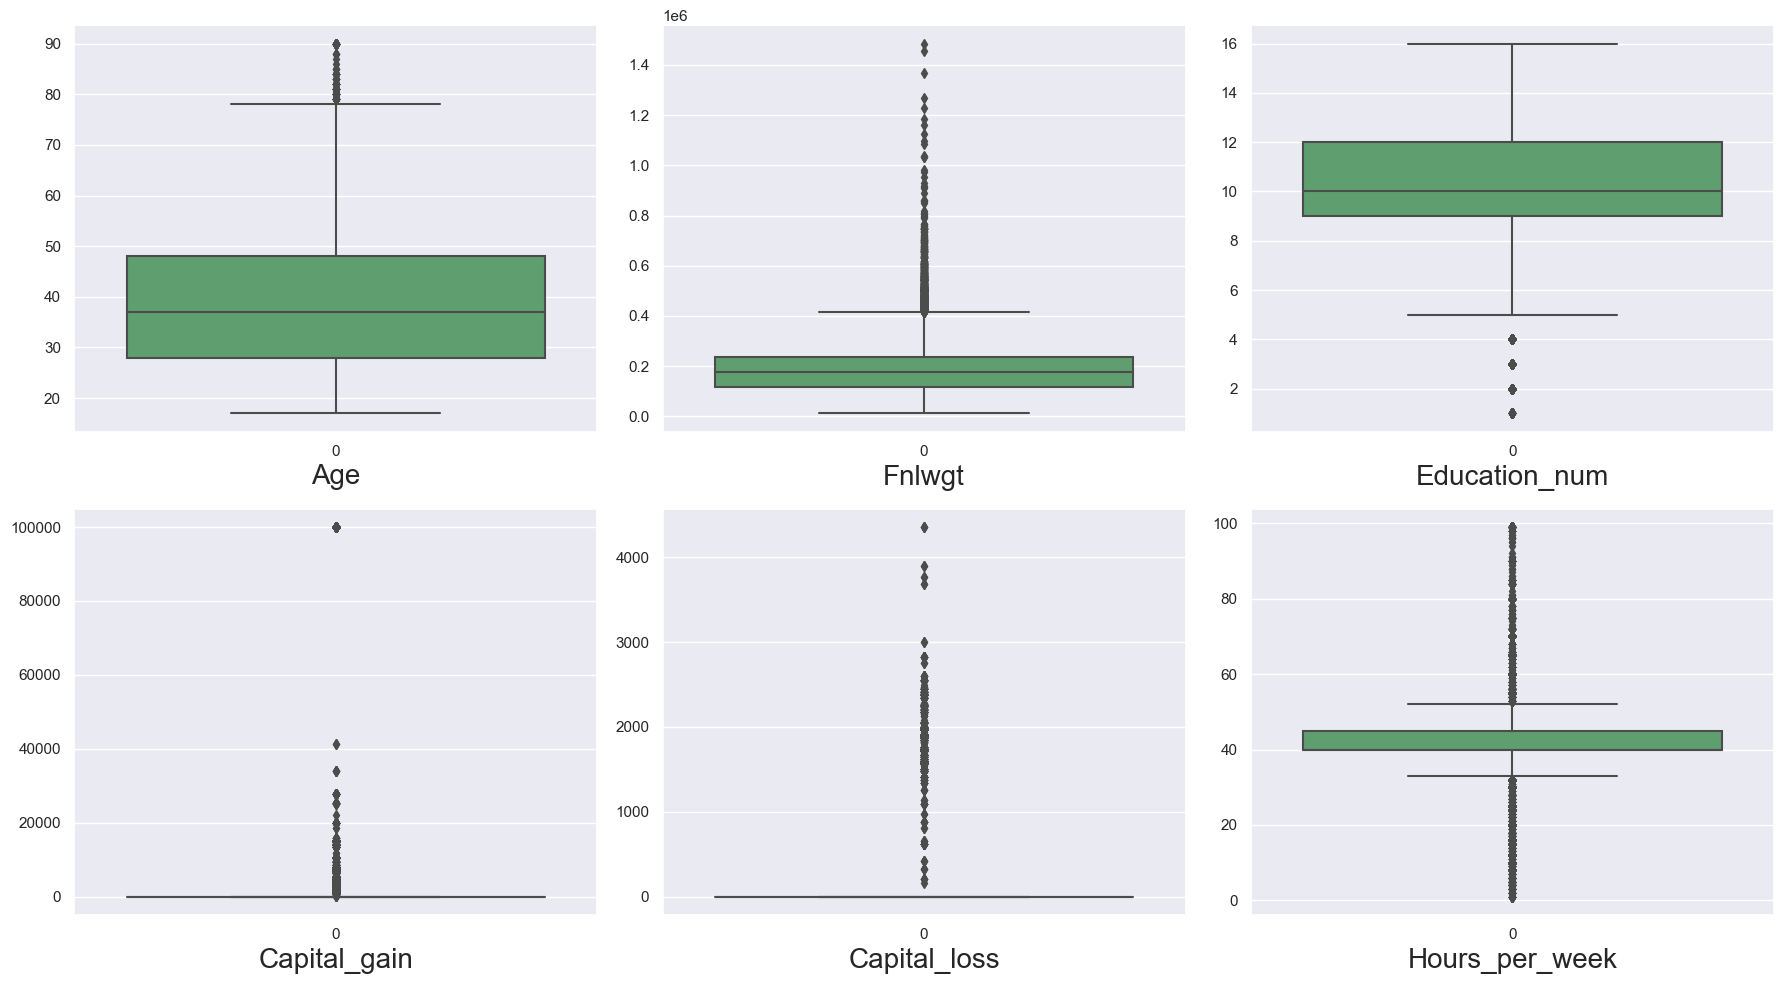

In [42]:
# Outliers Detection and Removal

plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [43]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education","age_group"], axis=1, inplace=True)

In [44]:
from scipy.stats import zscore

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Education_num   32536 non-null  int64
 3   Marital_status  32536 non-null  int32
 4   Occupation      32536 non-null  int32
 5   Relationship    32536 non-null  int32
 6   Race            32536 non-null  int32
 7   Sex             32536 non-null  int32
 8   Capital_gain    32536 non-null  int64
 9   Capital_loss    32536 non-null  int64
 10  Hours_per_week  32536 non-null  int64
 11  Native_country  32536 non-null  int32
 12  Income          32536 non-null  int32
dtypes: int32(8), int64(5)
memory usage: 3.5 MB


In [46]:
# Outliers removal using Zscore method

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 13)
Shape of the dataframe after removing outliers:  (28061, 13)
Percentage of data loss post outlier removal:  13.753995574133269


In [47]:
# Data Loss

print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


We are losing 13.75 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building. We have option to go for quantile method but by looking at boxplot we can say lower capping will result in useful data loss and eventually data loss will be more than zscore method.

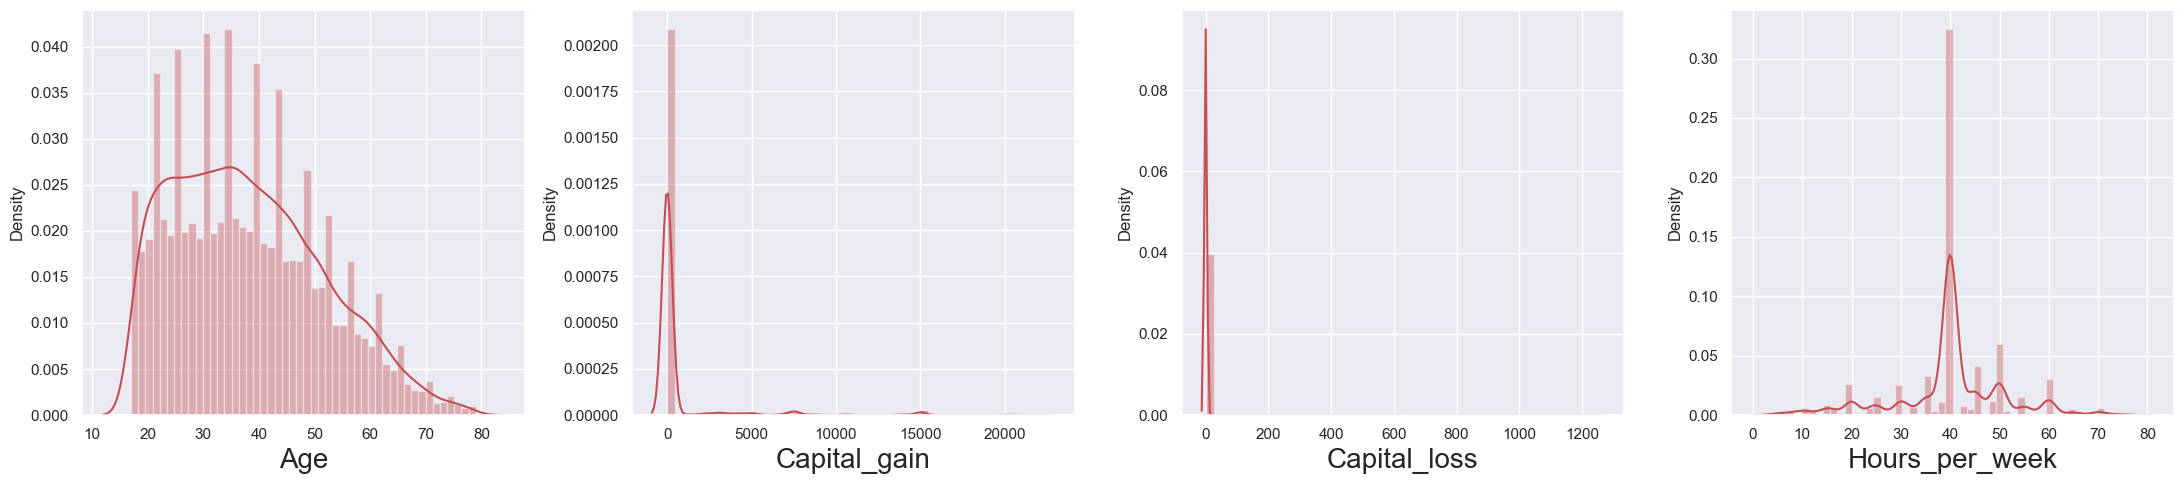

In [48]:
# Skewness of features

plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [49]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

Observation :

Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.

Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. There is no 

point in transforming it because at end data will be skewed.

In [50]:
# Corrleation

df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


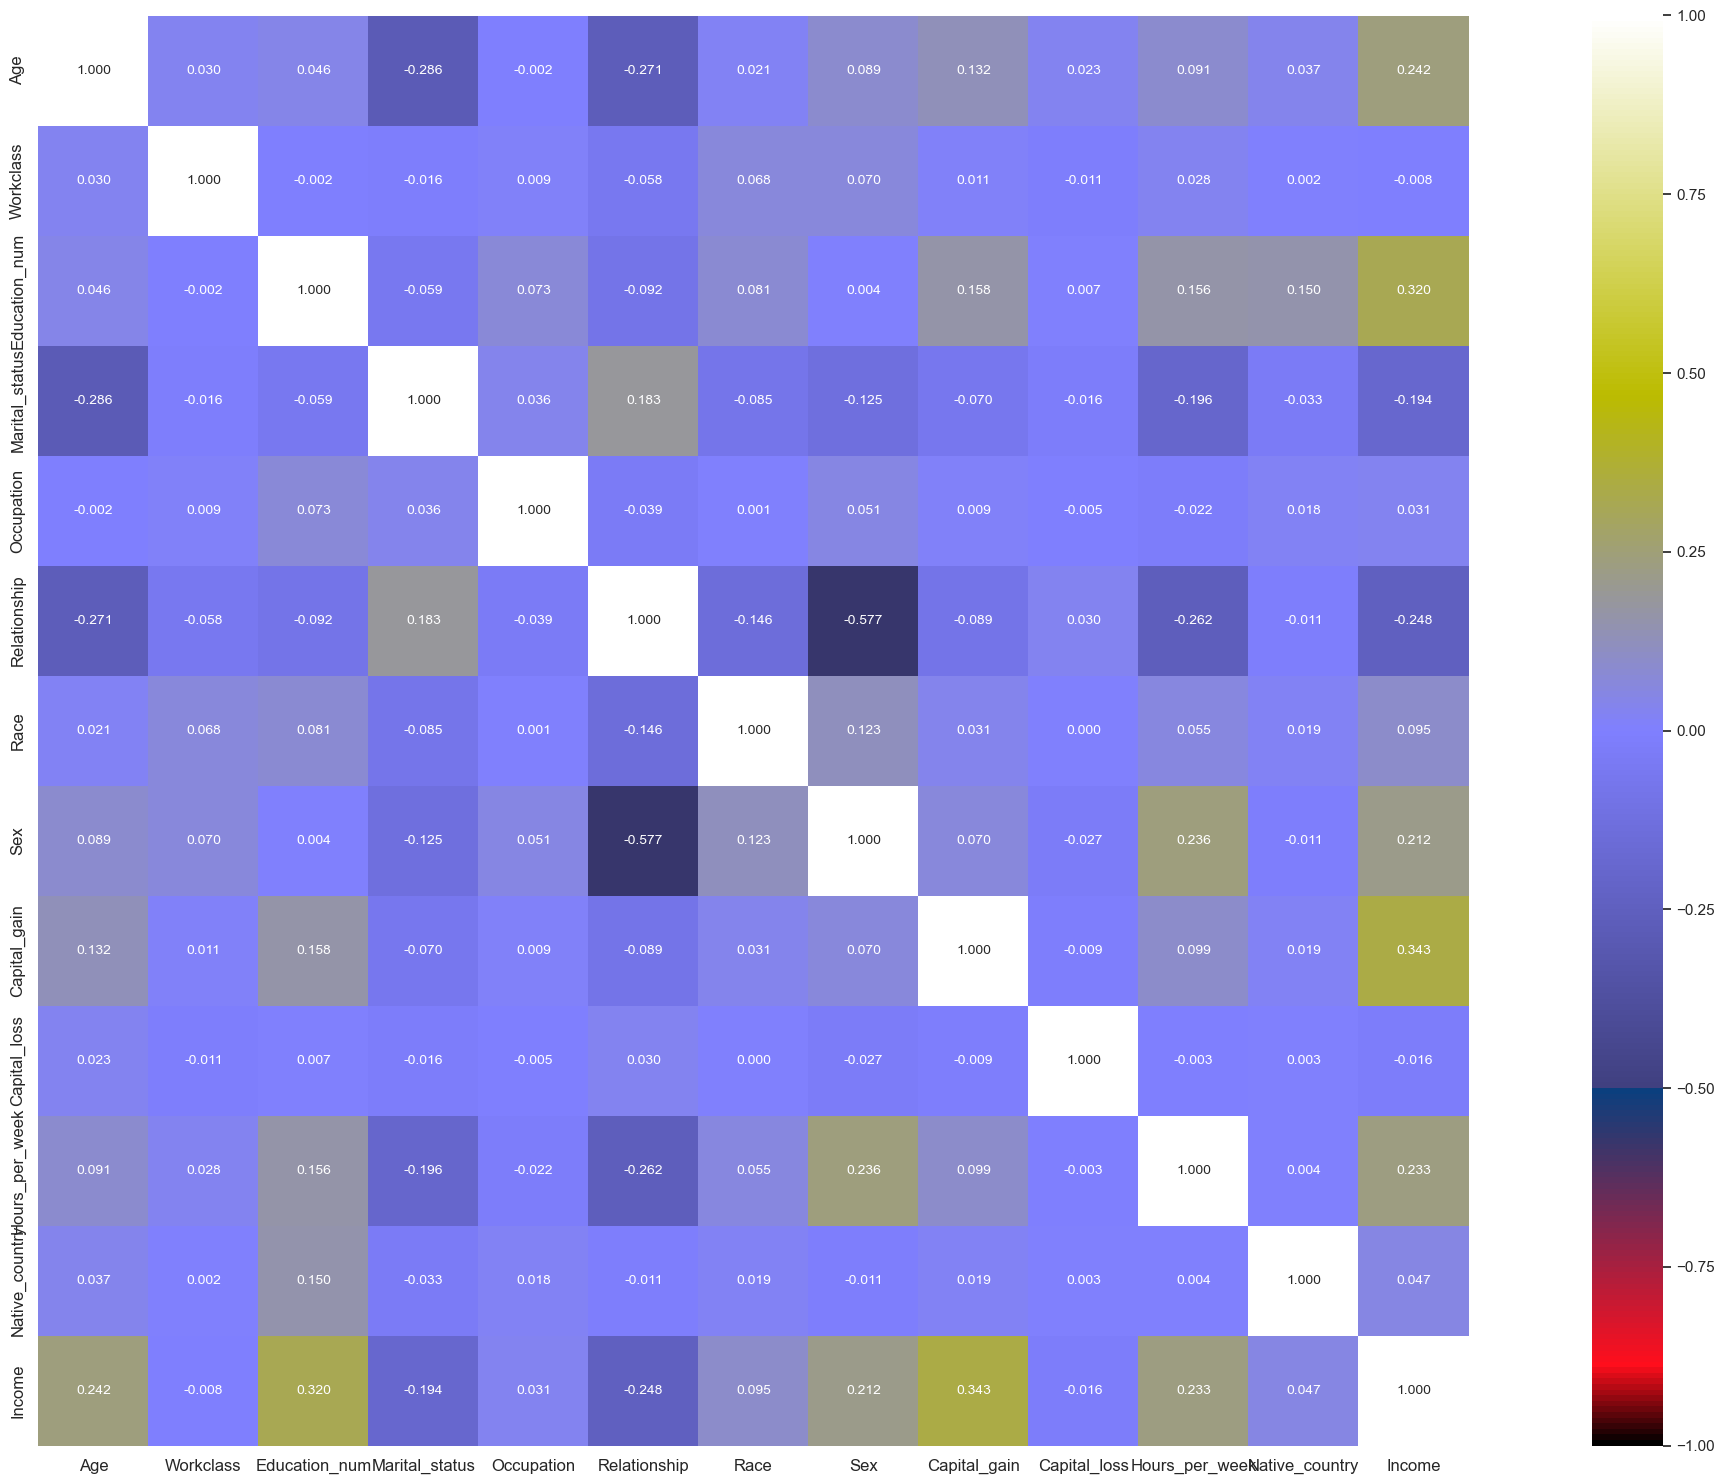

In [51]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


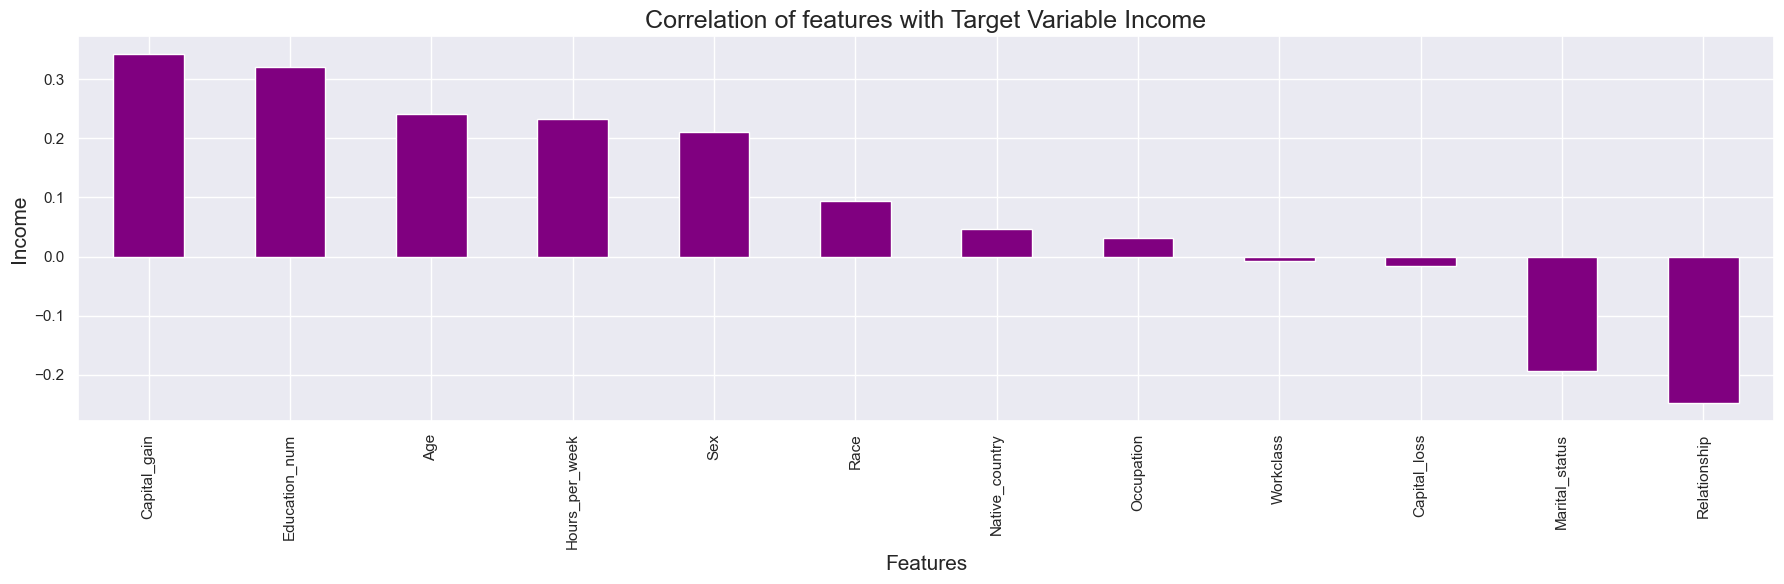

In [52]:
plt.figure(figsize = (18,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

Observation:

Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation. After checking Mulitcollinearity we will decide to drop these poorly correlated features or go for PCA.


As high or low Correlation doesnot mean its causation !!!


Between input features maximum correlation of -0.557 exist between sex and relationship.


Capital gain is highly correlated with target variable.

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Checking Multicollinearity between features using variance_inflation_factor


vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


Strategy to Address Multicollinearity :

Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.

Another way to address Multicollinerity is to Scaled Data and then apply PCA.

In [55]:
# Balanceing Imbalanced target feature

df.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

In [56]:
# Balancing using SMOTE

from imblearn.over_sampling import SMOTE

In [57]:
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [58]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [59]:
Y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

#### Standard Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

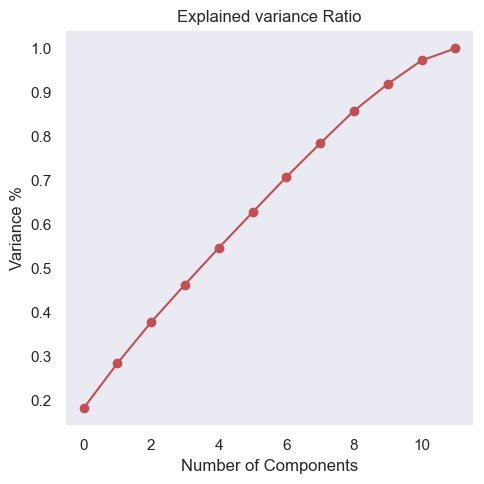

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [62]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [63]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

#### Machine Learning Model Building

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector size: (30473,)
Test feature matrix size: (13061, 9)
Test target vector size: (13061,)


In [66]:
# Finding best Random state

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7764336574534875 on Random_state 120


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=120, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7764336574534875


Confusion matrix of Logistics Regression : 
 [[4942 1589]
 [1331 5199]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      6531
           1       0.77      0.80      0.78      6530

    accuracy                           0.78     13061
   macro avg       0.78      0.78      0.78     13061
weighted avg       0.78      0.78      0.78     13061



In [68]:
# Finding Optimal value of n_neighbors for KNN

from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3980082099417968
RMSE value for k=  2 is: 0.42363378591034817
RMSE value for k=  3 is: 0.3918040976825994
RMSE value for k=  4 is: 0.4048742149468099
RMSE value for k=  5 is: 0.3936561487691346
RMSE value for k=  6 is: 0.3963697141685821
RMSE value for k=  7 is: 0.39433629071559106
RMSE value for k=  8 is: 0.39326696810180317
RMSE value for k=  9 is: 0.3955963091113955
RMSE value for k=  10 is: 0.39501526158734074
RMSE value for k=  11 is: 0.3964662837190876
RMSE value for k=  12 is: 0.39501526158734074


Comment-

At k=3, we get the minimum RMSE value which approximately 0.3918040976825994, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case

#### Applying other classification algorithm

In [69]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7764336574534875


Confusion matrix : 
 [[4942 1589]
 [1331 5199]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      6531
           1       0.77      0.80      0.78      6530

    accuracy                           0.78     13061
   macro avg       0.78      0.78      0.78     13061
weighted avg       0.78      0.78      0.78     13061



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8271954674220963


Confusion matrix : 
 [[4907 1624]
 [ 633 5897]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      6531
           1       0.78      0.90      0.84      6530

    accuracy                           0.83     13061
   macro avg       0.83      0.83      0.83     13061
weighted avg       0.83      0.83      0

#### CrossValidation :

In [70]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.7612266  0.76857701 0.76742851 0.77317101 0.77130714]
Mean Score : 0.7683420536842653
Std deviation : 0.00408974484215439




Cross Validation Score SVC() :

Score : [0.8132537  0.82037441 0.82611692 0.82738027 0.83023202]
Mean Score : 0.8234714650746271
Std deviation : 0.006032855118489882




Cross Validation Score GaussianNB() :

Score : [0.710348   0.72481911 0.73504077 0.72596761 0.73121985]
Mean Score : 0.7254790678729386
Std deviation : 0.008414348476296235




Cross Validation Score DecisionTreeClassifier() :

Score : [0.78936488 0.8127943  0.82232686 0.83231882 0.82827935]
Mean Score : 0.8170168434442994
Std deviation : 0.015307853602911143




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.80992305 0.84265533 0.84828299 0.8549443  0.853779  ]
Mean Score : 0.8419169353164806
Std deviation : 0.016583735318478798




Cross Validation Score RandomForestClassifier() :

Score : [0.82898817 0.85276

#### Hyper Parameter Tuning : GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]}

In [73]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.851 total time=   3.0s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.850 total time=   3.0s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.853 total time=   2.9s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.848 total time=   2.9s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

[CV 5/5; 8/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=150;, score=0.847 total time=   4.2s
[CV 1/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 1/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.847 total time=   5.6s
[CV 2/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 2/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.844 total time=   5.6s
[CV 3/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 3/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.849 total time=   5.6s
[CV 4/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 4/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.843 total time=   5.5s
[CV 5/5; 9/54] START criterion=gini, max_dep

[CV 4/5; 16/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.851 total time=   3.4s
[CV 5/5; 16/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100
[CV 5/5; 16/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.850 total time=   3.4s
[CV 1/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 1/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.857 total time=   5.1s
[CV 2/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 2/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.851 total time=   5.2s
[CV 3/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 3/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.854 total time=   5.2s
[CV 4/5; 17/54] START criterion=gin

[CV 3/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.852 total time=   7.5s
[CV 4/5; 24/54] START criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200
[CV 4/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.851 total time=   7.6s
[CV 5/5; 24/54] START criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200
[CV 5/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.852 total time=   7.6s
[CV 1/5; 25/54] START criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100
[CV 1/5; 25/54] END criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100;, score=0.855 total time=   3.5s
[CV 2/5; 25/54] START criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100
[CV 2/5; 25/54] END criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100;, score=0.853 total time=   3.7s
[CV 3/5; 25/54] START criterion=gin

[CV 2/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.846 total time=   4.8s
[CV 3/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 3/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.850 total time=   4.6s
[CV 4/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 4/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.843 total time=   4.7s
[CV 5/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 5/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.844 total time=   4.7s
[CV 1/5; 33/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=200
[CV 1/5; 33/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=200;, score=0.848 total time=   6.2s
[CV 2/5;

[CV 5/5; 39/54] END criterion=entropy, max_depth=30, min_samples_split=3, n_estimators=200;, score=0.853 total time=   8.2s
[CV 1/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 1/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.856 total time=   3.8s
[CV 2/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 2/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.852 total time=   3.8s
[CV 3/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 3/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.854 total time=   3.9s
[CV 4/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 4/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.851 total time=   4.0s
[CV 5/5;

[CV 3/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.851 total time=   6.8s
[CV 4/5; 47/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150
[CV 4/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.849 total time=   6.4s
[CV 5/5; 47/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150
[CV 5/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.855 total time=   6.6s
[CV 1/5; 48/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200
[CV 1/5; 48/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200;, score=0.856 total time=   9.1s
[CV 2/5; 48/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200
[CV 2/5; 48/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200;, score=0.852 total time=   8.9s
[CV 3/5;

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [74]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 200}

#### Final Model

In [75]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,min_samples_split= 3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8640226628895185


In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


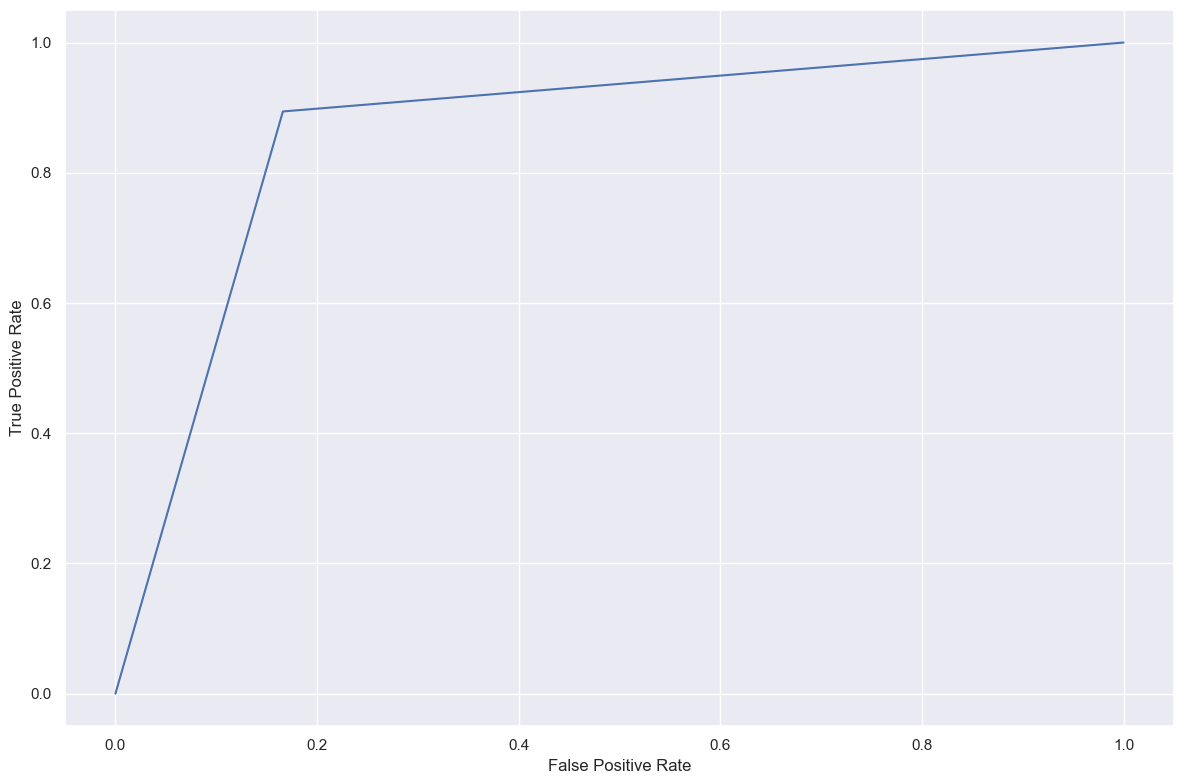

Auc Score :
 0.8640249717274875


In [77]:
#define metrics
y_pred_proba = Final_mod.predict(X_test)
fpr,tpr,_ = roc_curve(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

Conclusion:

we had mix of columns like numeric and object type. Have checked numeric columns except capital_loss and again, other columns were having min and other percentile score. we saw outlier also in these numeric columns. Outlier handled with ZScore .

we have done important analysis on categorical features with taregt variable and found certain interest facts like Workclass Private job people earning is high, from Sex columns we observed that male and female both are working in all the department/sector. Maximum people native country is United state thus we seen high earning for united state than other countries.we also observed that HS grad and some-collage are earning high from education columns.all categorical columns are Label Encoded.

As we seen that target class was imbalance data set, it was bent to one side which was <=50K. imbalance problem was handled by up sampling with SMOTE algorithm.Model was trained on both the dataset, i got high accuracy with upsample data, thus have considered the same.

In [78]:
# Saving model

import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']